# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [21]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [22]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [23]:
print("mnist.train.images is of type {}".format(type(mnist.train.images)))
print("Its shape is {}".format(mnist.train.images.shape))
print("Normalized? max, min, mean is {} {} {}".format(mnist.train.images.max(), 
                                                mnist.train.images.min(), mnist.train.images.mean()))

mnist.train.images is of type <class 'numpy.ndarray'>
Its shape is (60000, 784)
Normalized? max, min, mean is 1.0 0.0 0.13066062331199646


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

Image has its nonzero values between 0 and 1 [ 0.26274511  0.90980399  0.15294118  0.24313727  0.31764707  0.47058827
  0.70588237  0.15294118  0.49411768  0.63921571  0.00784314  0.60000002
  0.82352948  0.15686275  0.86274517  0.63921571  0.10588236  0.99607849
  0.63529414  0.8705883   0.63921571  0.71764708  0.99607849  0.49019611
  0.18039216  0.96078438  0.63921571  0.77647066  0.99607849  0.21960786
  0.47058827  0.99607849  0.63921571  0.09019608  0.90588242  0.99607849
  0.1137255   0.62352943  0.99607849  0.47058827  0.63921571  0.99607849
  0.84705889  0.0627451   0.62352943  0.99607849  0.26274511  0.05490196
  0.33725491  0.69803923  0.97254908  0.99607849  0.35686275  0.62352943
  0.99607849  0.33333334  0.18431373  0.19215688  0.45490199  0.56470591
  0.58823532  0.9450981   0.95294124  0.91764712  0.7019608   0.9450981
  0.98823535  0.15686275  0.58823532  0.99215692  0.92941183  0.81176478
  0.81176478  0.81176478  0.99215692  0.99607849  0.98039222  0.94117653
  0.776

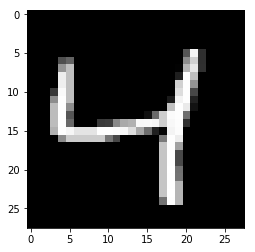

In [24]:
img = mnist.train.images[2]
print("Image has its nonzero values between 0 and 1", img[img.nonzero()])
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [25]:
image_size = mnist.train.images.shape[1]
print("The image size is: ", image_size)
print("The type of the images is :", type(mnist.train.images))

The image size is:  784
The type of the images is : <class 'numpy.ndarray'>


In [26]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value
print("We are encoding it as a size: ", encoding_dim)

We are encoding it as a size:  32


In [27]:
# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, [None, image_size], name='inputs')
print("This is our placeholder for the inputs: ", inputs_)

This is our placeholder for the inputs:  Tensor("inputs_1:0", shape=(?, 784), dtype=float32)


In [28]:
# Target has the same size as the input image, since it is its reconstruction
targets_ = tf.placeholder(tf.float32, [None, image_size], name='targets')
print("Targets are the same size as the original images: ", targets_)

Targets are the same size as the original images:  Tensor("targets_1:0", shape=(?, 784), dtype=float32)


In [29]:
# Output of hidden layer, single fully connected layer here with ReLU activation

# Arguments of tf.layers.dense are the inputs, the output dimension and the activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)
print("This is the encoding layer: ", encoded)

This is the encoding layer:  Tensor("dense_3/Relu:0", shape=(?, 32), dtype=float32)


In [30]:
# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
print("This is the output layer before sigmoid: ", logits)

This is the output layer before sigmoid:  Tensor("dense_4/BiasAdd:0", shape=(?, 784), dtype=float32)


In [31]:
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')
# flat images of the same size as the original images
print("Decoded is the sigmoid applied to the logits: ", decoded)

Decoded is the sigmoid applied to the logits:  Tensor("output_1:0", shape=(?, 784), dtype=float32)


In [32]:
# Sigmoid cross-entropy loss
# We are taking logits here, since the loss function already applies sigmoid to the logits
# So the loss is calculated with the decoded images:
# (from the documentation): let x = logits, z = labels. The logistic loss is
# z * -log(sigmoid(x)) + (1 - z) * -log(1 - sigmoid(x))
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=targets_)
# the loss is per unit:
# returns a Tensor of the same shape as logits with the componentwise logistic losses.
print("Loss is calculated with the logits and the targets since the loss function applies sigmoid: ", loss)

Loss is calculated with the logits and the targets since the loss function applies sigmoid:  Tensor("logistic_loss_1:0", shape=(?, 784), dtype=float32)


In [33]:
# Mean of the loss
cost = tf.reduce_mean(loss)
# sums up the losses
# example from the documentation:
x = tf.constant([[1., 1.], [2., 2.]])
tf.reduce_mean(x)  # 1.5
tf.reduce_mean(x, 0)  # [1.5, 1.5]
tf.reduce_mean(x, 1)  # [1.,  2.]

print("Cost is a sum over the losses: ", cost)

Cost is a sum over the losses:  Tensor("Mean_4:0", shape=(), dtype=float32)


In [34]:
# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)
print('Optimizer: ', opt)

Optimizer:  name: "Adam_1"
op: "NoOp"
input: "^Adam_1/update_dense_2/kernel/ApplyAdam"
input: "^Adam_1/update_dense_2/bias/ApplyAdam"
input: "^Adam_1/update_dense_3/kernel/ApplyAdam"
input: "^Adam_1/update_dense_3/bias/ApplyAdam"
input: "^Adam_1/Assign"
input: "^Adam_1/Assign_1"



## Training

In [35]:
# Create the session
sess = tf.Session()
print("Session: ", sess)

Session:  <tensorflow.python.client.session.Session object at 0x11e108048>


Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [36]:
epochs = 20

batch_size = 200

# the session is run with an initilization
sess.run(tf.global_variables_initializer())

for e in range(epochs):
    
    # now we are getting to the data
    for ii in range(mnist.train.num_examples//batch_size):
        
        # the data is loaded into a batch
        batch = mnist.train.next_batch(batch_size)
        
        # inputs and targets are loaded into the feed
        feed = {inputs_: batch[0], targets_: batch[0]}
        
        # the feed is put into the running session and cost is an output
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

    print("Epoch: {}/{}...".format(e+1, epochs),
          "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.1822
Epoch: 2/20... Training loss: 0.1437
Epoch: 3/20... Training loss: 0.1253
Epoch: 4/20... Training loss: 0.1154
Epoch: 5/20... Training loss: 0.1096
Epoch: 6/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0906
Epoch: 20/20... Training loss: 0.0956


## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

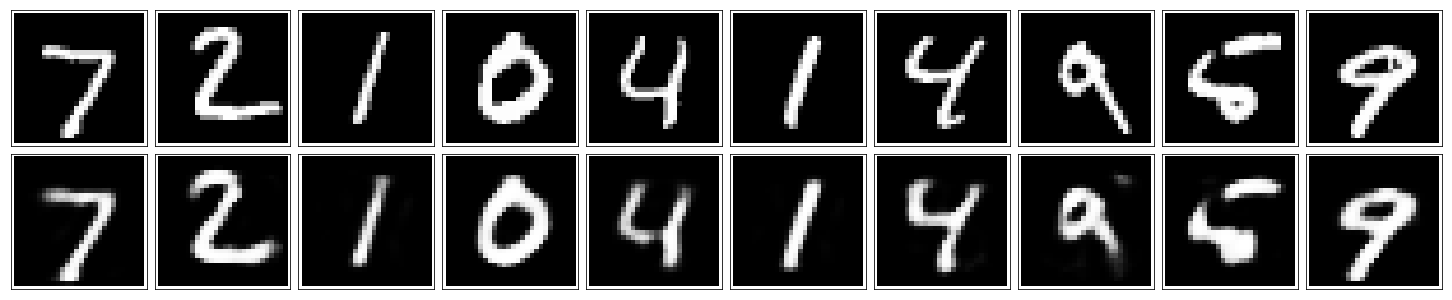

In [37]:
# 2 rows, 10 columns
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))

# input images
in_imgs = mnist.test.images[:10]

# you can tell the session which output you want
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

# show the images
for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

# suppress the axes
fig.tight_layout(pad=0.1)

In [38]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.